# Tutorial #23: Finding Data

In this tutorial you will be using the tools we learned about in today's lecture to find an interesting source from a catalog then find more data taken of that source

Find a catalog of X-ray properties (at least the X-ray flux) of AGN, and read it here

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

# eFEDS AGN catalog and X-ray spectral properties
f = fits.open("eFEDS_AGN_spec_V17.6.fits")

f.info()

# Header information from https://erosita.mpe.mpg.de/edr/eROSITAObservations/Catalogues/liuT/eFEDS_AGN_spec_V10.html
print("\nHeader 1 is: The eFEDS AGN catalog") 
print("\nHeader 2 is: Spectra information of all the eFEDS sources, including spectra extraction regions, count rates, observed fluxes, etc.")

spec = f[2].data

Filename: eFEDS_AGN_spec_V17.6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  AGN           1 BinTableHDU    271   22079R x 64C   [1J, 1D, 1D, E, 1L, 11A, D, D, I, I, E, I, I, 1J, 1J, 1J, 1J, D, D, 1D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1E, 1E, 1E, 1E, 1E, 1E, E, E, E, E, E, E]   
  2  Spec          1 BinTableHDU    228   27910R x 53C   [J, 1D, 1D, E, E, 1L, D, D, E, 1D, E, E, J, J, J, E, E, E, 1J, 1J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E]   
  3  m0:apec       1 BinTableHDU    243   27910R x 58C   [J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, 1E]   
  4  m1:pow        1 BinTableHDU    355   27910R x 86C   [J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E

List the 10 AGN with the brightest X-ray fluxes in the catalog

In [ ]:
print(spec.columns.names)
''' 
## Column name information from https://erosita.mpe.mpg.de/edr/eROSITAObservations/Catalogues/liuT/eFEDS_AGN_spec_V10.html
FluxObsv_Med_s 	float32 	erg/cm^2/s 	Observed flux in observed 0.5-2 keV, posterior median
FluxObsv_Lo1_s 	float32 	erg/cm^2/s 	Observed flux in observed 0.5-2 keV, 1sigma lower limit
FluxObsv_Up1_s 	float32 	erg/cm^2/s 	Observed flux in observed 0.5-2 keV, 1sigma upper limit
FluxObsv_Med_t 	float32 	erg/cm^2/s 	Observed flux in observed 2.3-5 keV, posterior median
FluxObsv_Lo1_t 	float32 	erg/cm^2/s 	Observed flux in observed 2.3-5 keV, 1sigma lower limit
FluxObsv_Up1_t 	float32 	erg/cm^2/s 	Observed flux in observed 2.3-5 keV, 1sigma upper limit
'''
#Table.read(f, hdu=2)

# Extract the column for observed flux in the 0.5-2 keV band
flux_column = spec['FluxObsv_Med_s']

# Get the indices of the 10 brightest sources
brightest_indices = np.argsort(flux_column)[-10:][::-1]

# List the 10 brightest AGN with their 'ID_SRC' (ID) and 'FluxObsv_Med_s' (Respective Flux)
brightest_agn = spec[brightest_indices]
print("\nThe top ten AGN with the brightest X-ray fluxes in the catalog are:\n")
print(f" ================================")
print(f" | ID_SRC | Flux [erg/(cm^2 s)] |")
print(f" ================================")
for agn in brightest_agn:
    print(f" |{agn['ID_SRC']:>6}  |{agn['FluxObsv_Med_s']:>19.04e}  |")
print(f" ================================")



['ID_SRC', 'RA_CORR', 'DEC_CORR', 'DET_LIKE', 'EXT_LIKE', 'inArea90', 'galNH', 'galNHI', 'Exposure', 'SrcCts', 'RA', 'DEC', 'Rad', 'Ann1', 'Ann2', 'REGAREA_s', 'Backscal_s', 'Backscal_b', 'FSModel', 'FHModel', 'Rate_d2_2d3', 'RateErr_d2_2d3', 'Rate_d2_d5', 'RateErr_d2_d5', 'Rate_d5_1', 'RateErr_d5_1', 'Rate_1_2', 'RateErr_1_2', 'Rate_2_4d5', 'RateErr_2_4d5', 'Rate_2d3_5', 'RateErr_2d3_5', 'Rate_5_8', 'RateErr_5_8', 'BkgCts_d2_d6', 'BkgCtsErr_d2_d6', 'BkgCts_d6_2d3', 'BkgCtsErr_d6_2d3', 'BkgCts_2d3_5', 'BkgCtsErr_2d3_5', 'BkgCts_5_8', 'BkgCtsErr_5_8', 'PSFCor_d2_d5', 'PSFCor_d5_1', 'PSFCor_1_2', 'PSFCor_2d3_5', 'Nempty', 'FluxObsv_Med_s', 'FluxObsv_Lo1_s', 'FluxObsv_Up1_s', 'FluxObsv_Med_t', 'FluxObsv_Lo1_t', 'FluxObsv_Up1_t']

The top ten AGN with the brightest X-ray fluxes in the catalog are:

 | ID_SRC | Flux [erg/(cm^2 s)] |
 |     1  |         4.3291e-12  |
 |     2  |         2.9747e-12  |
 |     3  |         2.2017e-12  |
 |    20  |         2.1490e-12  |
 |     4  |         2.11

Choose one of these 10 sources to find additional data on

Find image data of this source and plot the image below with the correct coordinate information on the axes. Also list the instrument that took the data

In [5]:
'''
There is not image data on this fits file (If there is I could not find it.)
'''

'\nThere is not image data on this fits file (If there is I could not find it.)\n'

Find optical spectra data of this source and plot the spectra below with the relavent units on each axis 

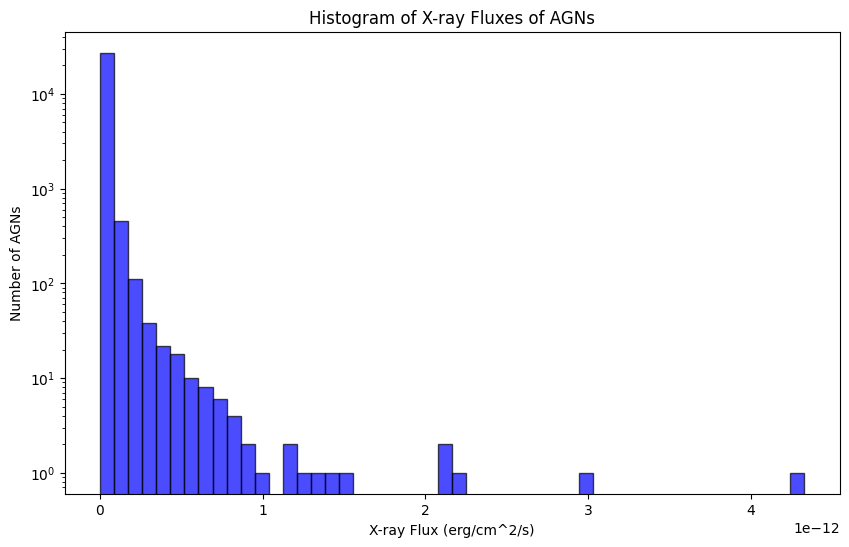